# Research Question
What are the best metrics to use to rank the value of a value stock for a dividend stock portfolio calculation and how can it be best enumerated to yield the most accurate results?

## Analysis Plan
I am interested in exploring how we can create appropriate abstracts/data summaries of the datasets used using the most suitable models and formulas for the clients' background information. This background information is aimed to help clients make decisions and be mindful of how each variable influences their portfolio creation process, having autonomy over the direction in which the portfolio calculations and analyses will head. To do this, there will be computation of relevant variables which are best fit to be analysed together, having backend-research to back up the relevance of each paired/grouped variable that is explored.

## Output of Analysis
The aim of this project is to return the best dividend stocks to invest in for both the long term and short term. Within the "best stock" measurement, the risk (safety of the industry, diversification, etc.) and payout is calculated on the company-level and industry-level.

This will be done in two stages: scoring the dividend stock as an individual stock then in comparison to stocks in its industry. 

The first stage involves defining and scoring individual dividend stocks at the company-level, analysing all stocks individually on how good a stock is to invest in on its own. In this section, an "Individual Score" out of 100 will be outputted to display its rating after mentioned calculations which includes the stock score alongside its risk score. 

The second stage will calculate the safety of an industry to be invested in and score them out of 100 as well. Then, within each industry it will sort the best stocks to invest in. This information will be useful when calculating the risk variable for portfolio (production). 

## Analysis 

### Stage 1: Defining a good dividend stock
1. Consistent Dividend Payments: a good track record of dividend payments over time indicates that the company has a stable financial position from generating sufficient cash flow - an important variable to support dividend payments.
2. Strong Financials: A strong balance sheet, healthy cash flow, and sustainable earnings growth ensures that the company can continue to pay dividends through tough economic times.
3. Low payout Ratio (percentage of earnings paid out as dividends): a high payout ratio means the company is not reinvesting enough capital to support future growth.
4. Competitive Dividend Yield: This is compared to other companies in the same industry of the broader market. (Note: a high yield is attractive but may not be sustainable of the company itself fundamentally, hence it is only taken as a weak variable.)
5. Commitment to Dividend Policy: Having a good management team that is commited to maintaining or increasing dividend payments over time demonstrates confidence in the company's future prospects and willingness to share profits with shareholders. (we cannot measure this) 

### Stage 1.2: Calculating the risk score (based on the company’s industry position) 

#### Key risk factors: 
1. Payout Ratio: a higher percentage of its earnings as dividends → higher risk
1. Debt levels: companies with higher debt may struggle to continue paying dividends and are in more of a risk to declare bankruptcy 
1. Industry volatility: cyclical industries are at risk of volatile earnings and cash flows
1. Economic uncertainty: in uncertain economic environments, companies may perserve cash over paying dividends and hence would result in a cut of dividends (we will not measure this)

#### Quantifying the variables into a score of 0-100 using a weighted average.
##### Assigning weights to each variable: 
1. Payout ratio: 35% – a high payout ratio means company is paying a lot of its earnings in dividends, which is cited in many investing cites as a “red flag” as they reinvest less money into the company or to deal with unexpected events. This is risky for long term (critical for dividend sustainability) 
1. Debt levels: 25% – if a company continues to face financial difficulty or if interest rates rise, they may not be able to sustain dividend payments. This is a second critical element as debt significantly impacts a company’s financial health. 
1. Industry Volatility: 15% – if an industry is volatile or cyclical, it may show unstable earnings and cash flows and hence are not able to pay dividends consistently. (not good for long term) (back up with info from econ textbook)
1. Dividend history: 25% – this provides insights into its commitment to maintaining or increasing dividends over time. This can account for the company’s commitment to dividend policy to an extent. 


### Stage 2.2: Calculating the risk score (based on the industry, safety score) Industry Safety Score
1. Industry stability: 30% – Stable industries have steady demand for their products or services, hence they are less susceptible to economic downturns or competition from new entrants. Long history of stable growth and profitability shows a stable industry, 
1. Financial health of companies within each industry: 30% - These financial health variables rely on cash flows, debt-to-equity ratio, earnings growth, and history of dividend payments. 
1. Healthy balance sheet generating consistent cash flows
1. Low debt-to-equity ratio: amount of debt a company has compared to its equity ; high DTE can indicate a company is heavily leveraged and may have difficulty meeting its financial obligations in the future. (bad for long term) 
1. Strong earning growth: companies that are growing their earning over time, as it provides a foundation for future dividend increases. 
1. History of consistent dividend payments – consistent track record: confidence in the company’s ability to continue paying dividends in the future. 
1. Evaluate credit ratings
1. Things we are not measuring here:
1. Regulatory environment (can impact the safety of an industry – regulatory risks of an industry like changes in tax laws, tariffs, or environmental regulations) can impact them a lot. But we will not be measuring it here. 
1. Economic conditions: economic outlook such as inflation or interest rates may cause potential risks. 


### Stage 3: Worthiness




assumptions: 
we are dropping all columns with NA values and assuming they will not be good for our calculations

things i might do next:
1. redo the tables and only remove the na values when they are present in my columns

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px

In [4]:
# uploading complete data frame without NA values
complete = pd.read_csv("/Users/keishavalenna/Desktop/Files/project-group-group15/data/processed/processed_us_equities_tradingview_data_complete_data.csv")

# Data frame with required columns
df = complete[['Ticker', 'Description','Sector','Price','Price to Earnings Ratio (TTM)','Basic EPS (FY)','Gross Profit (FY)','Debt to Equity Ratio (MRQ)','Net Income (FY)','Dividend Yield Forward','Dividends Paid (FY)','Dividends per Share (FY)','Current Ratio (MRQ)','Volatility','Total Shares Outstanding','Total Revenue (FY)','Net Debt (MRQ)']]

### CALCULATING VARIABLES ###

## Variable 1: Payout Ratio
payout_ratio = df[['Ticker','Description','Sector','Dividends per Share (FY)','Basic EPS (FY)']]
payout_ratio['Payout Ratio'] = (payout_ratio['Dividends per Share (FY)'])/(payout_ratio['Basic EPS (FY)'])


## Variable 2: Financial Health
# cash flow
cash_flow = df[['Ticker', 'Description','Sector','Price','Gross Profit (FY)','Total Revenue (FY)']]
cash_flow['Cash Flow'] = (cash_flow['Gross Profit (FY)']/cash_flow['Total Revenue (FY)'])*100

# profitability
profitability = df[['Ticker', 'Description','Sector','Basic EPS (FY)']]

# debt levels
debt_levels = df[['Ticker', 'Description','Sector','Price','Debt to Equity Ratio (MRQ)','Current Ratio (MRQ)','Gross Profit (FY)']]
debt_levels['Debt Levels'] = debt_levels.apply(lambda row: (row['Debt to Equity Ratio (MRQ)'] + row['Current Ratio (MRQ)'] + row['Current Ratio (MRQ)']) / 3, axis=1)

financial_health = df[['Ticker', 'Description','Sector','Price']]
financial_health['Cash Flow'] = cash_flow['Cash Flow']
financial_health['Profitability'] = profitability['Basic EPS (FY)']
financial_health['Debt Levels'] = debt_levels['Debt Levels']
financial_health['Financial Health'] = (financial_health['Cash Flow']+financial_health['Profitability']+financial_health['Debt Levels'])/3

## Variable 3: Industry volatility
per_industry = df.groupby('Sector')['Gross Profit (FY)'].sum().reset_index()
per_industry_df = per_industry.apply(lambda x: x.reset_index(drop=True))

# number of companies
companies = df.groupby('Sector').size().reset_index()
companies_df = companies.apply(lambda x: x.reset_index(drop=True))
column = companies_df.iloc[:,1]
per_industry_df['No. of Companies'] = column

# average return
per_industry_df['Average return'] = per_industry_df['Gross Profit (FY)']/per_industry_df['No. of Companies']

# variance of returns
new = pd.merge(df,per_industry_df,on='Sector', how='left')
variance = new[['Ticker', 'Description','Sector','Price','Gross Profit (FY)_x','Average return','No. of Companies']]
variance['Variance'] = ((variance['Average return']/variance['Gross Profit (FY)_x'])**2)/(variance['No. of Companies']-1)
variance['Standard Deviation'] = variance['Variance'].apply(lambda x: np.sqrt(x))


## Variable 4: Dividend history
div_history = df[['Ticker', 'Description','Sector','Price','Dividends per Share (FY)']]
div_history['Dividend Yield'] = (div_history['Dividends per Share (FY)']/div_history['Price'])*100


### DATAFRAME WITH ALL KEY VARIABLES ###
df['Payout Ratio'] = payout_ratio['Payout Ratio']
df['Debt Levels'] = debt_levels['Debt Levels']
df['Cash Flow'] = cash_flow['Cash Flow']
df['Volatility'] = variance['Standard Deviation']
df['Dividend Yield'] = div_history['Dividend Yield']
df['Financial Health'] = financial_health['Financial Health']
df = df[['Ticker','Description','Sector','Price','Payout Ratio', 'Debt Levels', 'Cash Flow', 'Volatility','Dividend Yield','Price to Earnings Ratio (TTM)','Debt to Equity Ratio (MRQ)','Financial Health','Basic EPS (FY)']]


/var/folders/dr/9hhpl0xn2tz1v437z4s28rq40000gn/T/ipykernel_69818/3361140596.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payout_ratio['Payout Ratio'] = (payout_ratio['Dividends per Share (FY)'])/(payout_ratio['Basic EPS (FY)'])
/var/folders/dr/9hhpl0xn2tz1v437z4s28rq40000gn/T/ipykernel_69818/3361140596.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_flow['Cash Flow'] = (cash_flow['Gross Profit (FY)']/cash_flow['Total Revenue (FY)'])*100
/var/folders/dr/9hhpl0xn2tz1v437z4s28rq40000gn/T/ipyk

In [5]:
df

,Ticker,Description,Sector,Price,Payout Ratio,Debt Levels,Cash Flow,Volatility,Dividend Yield,Price to Earnings Ratio (TTM),Debt to Equity Ratio (MRQ),Financial Health,Basic EPS (FY)
0,AAPL,Apple Inc.,Electronic Technology,143.00,0.146232,1.457725,43.309631,0.007889,0.629371,23.914718,2.614462,16.973985,6.1546
1,MSFT,Microsoft Corporation,Technology Services,242.71,0.255575,1.429485,68.401674,0.008908,1.021796,27.591728,0.425831,26.511587,9.7036
2,GOOG,Alphabet Inc.,Technology Services,97.95,0.000000,1.716958,56.914885,0.008244,0.000000,20.266028,0.115666,21.441981,5.6941
3,AMZN,"Amazon.com, Inc.",Retail Trade,100.55,0.000000,0.974920,42.032514,0.025749,0.000000,93.884298,1.051575,15.434745,3.2968
4,BRK.A,Berkshire Hathaway Inc.,Finance,465039.98,0.000000,2.786676,19.980152,0.007433,0.000000,NaN,0.264500,19827.588943,59460.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,AXON,"Axon Enterprise, Inc.",Electronic Technology,191.46,-0.000000,1.867119,61.512357,2.536810,0.000000,133.451734,0.013247,20.824259,-0.9067
496,RE,"Everest Re Group, Ltd.",Finance,346.92,0.178876,0.396914,NaN,NaN,1.787156,26.425990,0.403190,NaN,34.6608
497,NDSN,Nordson Corporation,Producer Manufacturing,235.97,0.244845,1.030441,55.072699,0.895243,0.923846,27.181448,0.375028,21.668913,8.9036
498,U,Unity Software Inc.,Technology Services,33.43,-0.000000,2.536016,77.161273,1.409843,0.000000,NaN,0.822193,25.958997,-1.8203


In [6]:
def payout_risk(value):
    
    #if in range, automatically low risk:
    if value >= 0.3 and value <= 0.5:
        return 0.0  
    
    #if not in range, goes through normalization then 
    
    elif value < 0.3:
        return 1.0 - (0.3 - value)  # higher score for values below the range
    else:
        return 1.0 - (value - 0.5) 

    
df['Payout Ratio'] = df['Payout Ratio'].apply(payout_risk)

for x in df['Payout Ratio']:
    if(x < 0):
        x = 1

# View the resulting dataframe with scores
df.to_csv('test.csv')

In [7]:
#### Indicating values in the sign they indicate in terms of viability


### CALCULATING RISK ###
df['Risk'] = 0.35*df['Payout Ratio'] + 0.25*df['Debt Levels'] + 0.15*df['Volatility'] + 0.25*df['Dividend Yield']


### INDUSTRY SAFETY SCORE ###
df['Industry Safety Score'] = 0.5*df['Volatility'] + 0.5*df['Debt to Equity Ratio (MRQ)']

#Risk is then represented as negative values because it is a negative variable when calculating worthiness.
df['Risk'] *= -1

### WORTHINESS OF INVESTING ###
df['Worthiness'] = 0.1*df['Dividend Yield'] + 0.1*df['Risk'] + 0.1*df['Financial Health'] + 0.50*df['Price to Earnings Ratio (TTM)'] + 0.2*df['Industry Safety Score']

df.to_csv('new.csv')
df

#to keep it controlled, we will still have P/E ratio as the most important variable when calculating worthiness. 
#(P/E) ratio. This simply is a measure of the stock price as a multiple of its EPS.

,Ticker,Description,Sector,Price,Payout Ratio,Debt Levels,Cash Flow,Volatility,Dividend Yield,Price to Earnings Ratio (TTM),Debt to Equity Ratio (MRQ),Financial Health,Basic EPS (FY),Risk,Industry Safety Score,Worthiness
0,AAPL,Apple Inc.,Electronic Technology,143.00,0.846232,1.457725,43.309631,0.007889,0.629371,23.914718,2.614462,16.973985,6.1546,-0.819138,1.311175,13.898016
1,MSFT,Microsoft Corporation,Technology Services,242.71,0.955575,1.429485,68.401674,0.008908,1.021796,27.591728,0.425831,26.511587,9.7036,-0.948608,0.217369,16.497815
2,GOOG,Alphabet Inc.,Technology Services,97.95,0.700000,1.716958,56.914885,0.008244,0.000000,20.266028,0.115666,21.441981,5.6941,-0.675476,0.061955,12.222056
3,AMZN,"Amazon.com, Inc.",Retail Trade,100.55,0.700000,0.974920,42.032514,0.025749,0.000000,93.884298,1.051575,15.434745,3.2968,-0.492592,0.538662,48.544096
4,BRK.A,Berkshire Hathaway Inc.,Finance,465039.98,0.700000,2.786676,19.980152,0.007433,0.000000,NaN,0.264500,19827.588943,59460.0000,-0.942784,0.135966,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,AXON,"Axon Enterprise, Inc.",Electronic Technology,191.46,0.700000,1.867119,61.512357,2.536810,0.000000,133.451734,0.013247,20.824259,-0.9067,-1.092301,1.275028,68.954069
496,RE,"Everest Re Group, Ltd.",Finance,346.92,0.878876,0.396914,NaN,NaN,1.787156,26.425990,0.403190,NaN,34.6608,NaN,NaN,NaN
497,NDSN,Nordson Corporation,Producer Manufacturing,235.97,0.944845,1.030441,55.072699,0.895243,0.923846,27.181448,0.375028,21.668913,8.9036,-0.953554,0.635135,15.881672
498,U,Unity Software Inc.,Technology Services,33.43,0.700000,2.536016,77.161273,1.409843,0.000000,NaN,0.822193,25.958997,-1.8203,-1.090481,1.116018,NaN


In [8]:
df_worthiness = df.sort_values(by='Worthiness', ascending=False).reset_index().drop(['index'],axis=1)
df_worthiness.to_csv('final.csv')
df_worthiness

,Ticker,Description,Sector,Price,Payout Ratio,Debt Levels,Cash Flow,Volatility,Dividend Yield,Price to Earnings Ratio (TTM),Debt to Equity Ratio (MRQ),Financial Health,Basic EPS (FY),Risk,Industry Safety Score,Worthiness
0,STZ,"Constellation Brands, Inc.",Consumer Non-Durables,226.36,-13.626107,1.328084,52.140153,0.388579,1.342993,2325.101626,1.396434,17.752012,-0.2122,4.043081,0.892507,1165.043123
1,PODD,Insulet Corporation,Health Technology,286.20,0.700000,3.718541,68.802330,2.182015,0.000000,1206.168145,3.286682,24.256357,0.2482,-1.501937,2.734349,605.906384
2,CRM,"Salesforce, Inc.",Technology Services,164.75,0.700000,0.728173,65.646233,0.069466,0.000000,592.864865,0.246736,22.628802,1.5120,-0.437463,0.158101,298.683186
3,GPN,Global Payments Inc.,Commercial Services,110.29,0.969779,0.842840,55.727002,0.287312,0.806963,503.169643,0.607206,19.956281,3.2990,-0.794970,0.447259,253.671101
4,PINS,"Pinterest, Inc.",Technology Services,25.92,0.700000,6.328850,79.468020,0.589684,0.000000,323.728814,0.058274,28.763757,0.4944,-1.915665,0.323979,164.614012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,BIO,"Bio-Rad Laboratories, Inc.",Health Technology,464.26,0.700000,3.723131,56.993511,0.990360,0.000000,NaN,0.164377,67.682847,142.3319,-1.324337,0.577368,NaN
496,MKTX,"MarketAxess Holdings, Inc.",Finance,367.16,0.000000,NaN,81.613114,0.699454,0.762610,55.986228,0.076474,NaN,6.6783,NaN,0.387964,NaN
497,CRBG,Corebridge Financial Inc.,Finance,21.39,NaN,NaN,NaN,NaN,NaN,1.176406,1.830890,NaN,11.4031,NaN,NaN,NaN
498,RE,"Everest Re Group, Ltd.",Finance,346.92,0.878876,0.396914,NaN,NaN,1.787156,26.425990,0.403190,NaN,34.6608,NaN,NaN,NaN


In [9]:
# Remove outliers function

def remove_outliers(df, column, sdv=3):
    """
    Takes out infinite or NA values and removes outliers (based on z-score values) of a specific column in a DataFrame.
    :param df: DataFrame 
    :param col_name: Column with outliers
    :return: DataFrame without outliers
    """
    # Remove non-integers (e.g. inf or NA)
    filtered_col = pd.to_numeric(df[column], errors='coerce')
    non_integers = ~np.isfinite(filtered_col)
    filtered_col[non_integers] = np.nan
    filtered_df = df.loc[~non_integers]
    
    # Calculate z-score
    z_scores = np.abs((filtered_df['Worthiness'] - filtered_df['Worthiness'].mean()) / filtered_df['Worthiness'].std())

    # Remove z-score outliers
    outliers = (-3 > z_scores) | (z_scores > 3)
    df_no_outliers = filtered_df.loc[~outliers]

    return df_no_outliers

In [10]:
data = remove_outliers(df_worthiness,'Worthiness')
data = data[data['Worthiness'] < 200]
data.to_csv('finalfinal.csv')

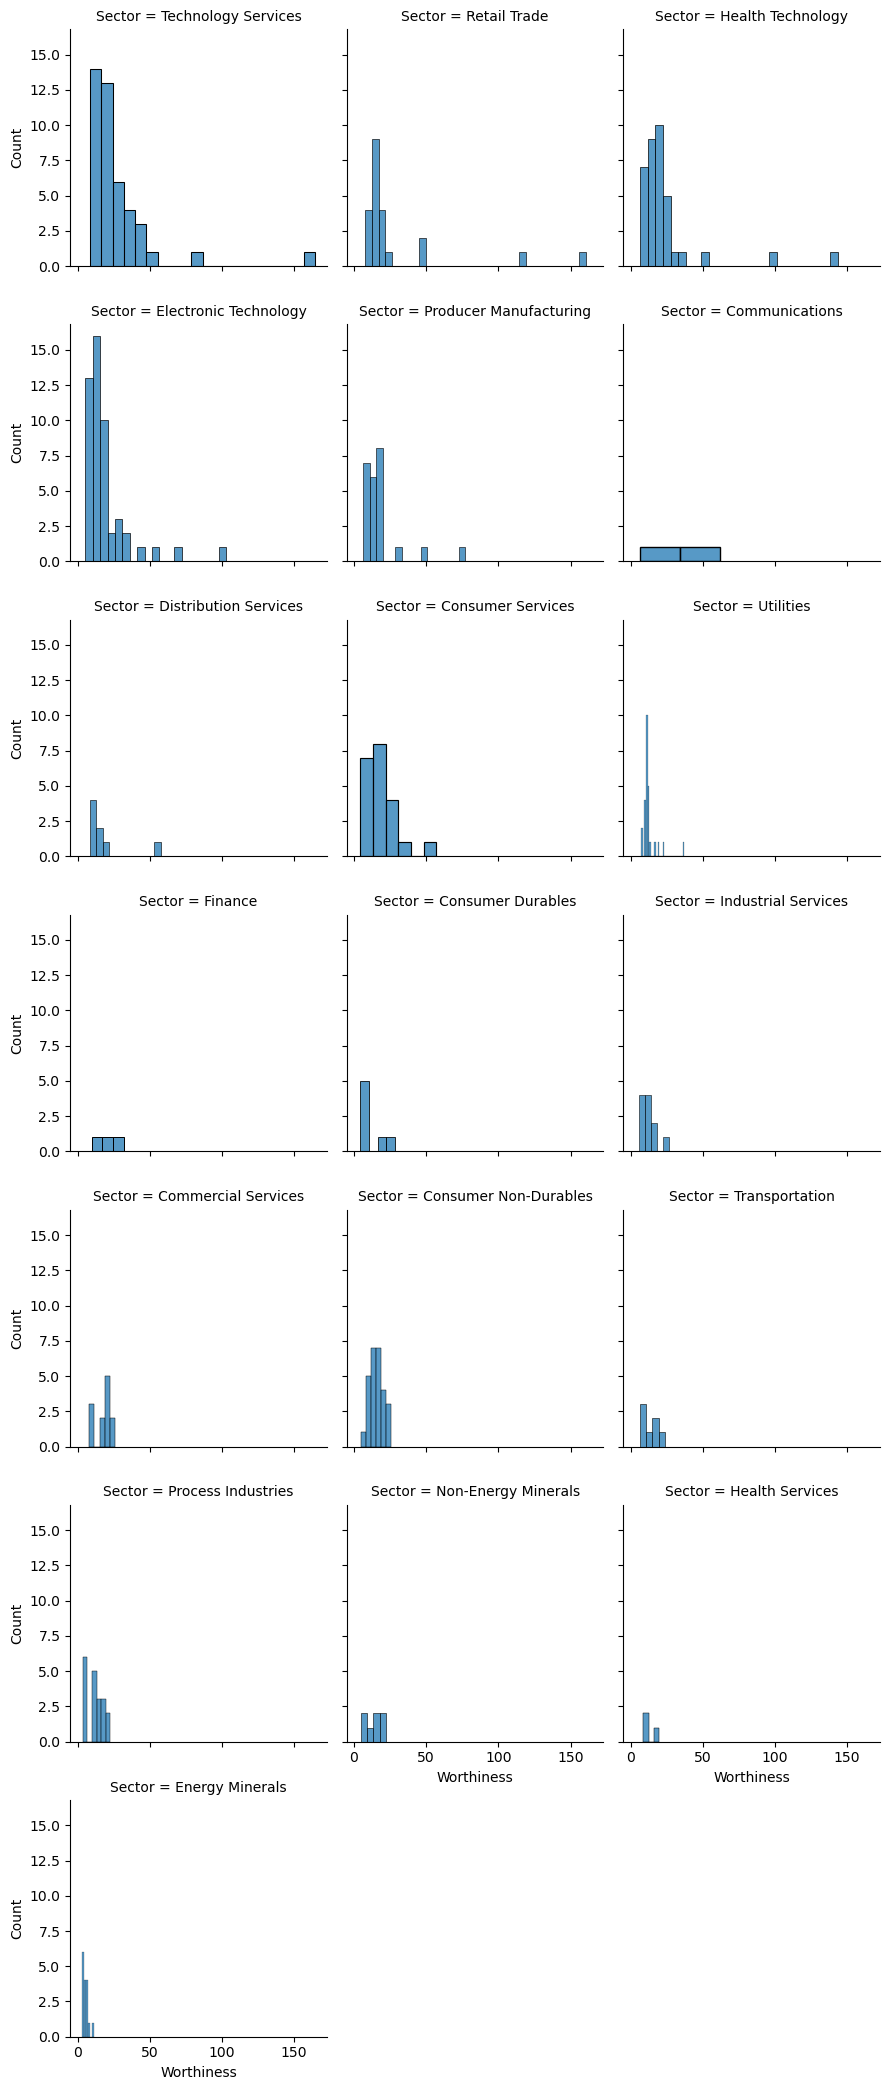

In [11]:
g = sns.FacetGrid(data, col='Sector',col_wrap=3)
g.map(sns.histplot, 'Worthiness')
g.savefig("FacetPlot")
#change bin size

In [12]:
def normalize(df, column):
    max_val = df[column].max()
    min_val = df[column].min()
    return 100 * ( df[column] - min_val) / (max_val - min_val)

In [13]:
data['Normalized'] = normalize(data,'Worthiness')
data

,Ticker,Description,Sector,Price,Payout Ratio,Debt Levels,Cash Flow,Volatility,Dividend Yield,Price to Earnings Ratio (TTM),Debt to Equity Ratio (MRQ),Financial Health,Basic EPS (FY),Risk,Industry Safety Score,Worthiness,Normalized
4,PINS,"Pinterest, Inc.",Technology Services,25.92,0.700000,6.328850,79.468020,0.589684,0.000000,323.728814,0.058274,28.763757,0.4944,-1.915665,0.323979,164.614012,100.000000
5,BABA,Alibaba Group Holding Limited,Retail Trade,111.20,0.700000,1.229789,35.485111,0.107797,0.000000,318.482647,0.149133,13.432600,3.5829,-0.568617,0.128465,160.553415,97.486537
6,BMRN,BioMarin Pharmaceutical Inc.,Health Technology,114.70,0.700000,3.511576,71.157897,1.255758,0.000000,281.831291,0.236846,24.773024,-0.3504,-1.311258,0.746302,143.411082,86.875627
7,MELI,"MercadoLibre, Inc.",Retail Trade,1161.80,0.700000,2.055655,41.162295,1.747416,0.000000,229.471449,3.496015,14.963550,1.6727,-1.021026,2.621715,116.654320,70.313494
8,FSLR,"First Solar, Inc.",Electronic Technology,170.78,0.700000,2.744755,24.955078,1.846754,0.000000,203.529278,0.053741,10.703511,4.4107,-1.208202,0.950248,102.904220,61.802337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,VLO,Valero Energy Corporation,Energy Minerals,140.19,0.834316,1.086014,9.496947,0.157384,2.796205,4.916254,0.493825,13.255920,29.1848,-1.286173,0.325604,3.999843,0.581647
344,OXY,Occidental Petroleum Corporation,Energy Minerals,64.13,0.724736,0.989095,29.288961,0.346703,0.062373,5.543476,0.762117,10.631718,1.6171,-0.568530,0.554410,3.895176,0.516859
345,MOS,Mosaic Company (The),Process Industries,48.50,0.763767,1.020210,25.787787,0.339949,0.567010,4.840397,0.370847,10.373532,4.3126,-0.715116,0.355398,3.513821,0.280805
346,MPC,Marathon Petroleum Corporation,Energy Minerals,129.14,0.642836,1.378969,5.711447,0.385372,1.796500,5.832689,0.825936,3.265672,2.7066,-1.076666,0.605654,3.436026,0.232651


In [14]:
column = data['Normalized'].to_numpy()
column

# dict = {}
# for item in column:
#     if item[:3] not in dict:
#         dict[item[:3]] = []
#     dict[item[:3]].append(item)


array([100.        ,  97.4865366 ,  86.8756267 ,  70.31349362,
        61.80233699,  59.45703826,  51.10939285,  45.75594482,
        40.7875777 ,  36.22949384,  33.68321764,  33.32543871,
        30.66541653,  29.06154046,  28.29375099,  28.15403592,
        27.89554276,  27.82886371,  26.37842056,  23.35304782,
        23.23826742,  22.97578473,  22.31704117,  21.42743001,
        21.2111053 ,  20.18284245,  19.86380278,  19.79596888,
        18.91010094,  18.42162906,  18.05545846,  17.50675551,
        17.37668619,  17.07415887,  16.5116962 ,  15.79817519,
        15.76960259,  15.6884724 ,  15.6392753 ,  15.55178803,
        15.4758205 ,  15.34861663,  15.2065896 ,  15.1255921 ,
        14.80573084,  14.39117332,  14.37474822,  14.25810394,
        13.89180605,  13.8543015 ,  13.57031164,  13.39417381,
        13.29888522,  13.14157095,  12.8714969 ,  12.81226235,
        12.80483144,  12.75710899,  12.5593272 ,  12.40264468,
        12.37781255,  12.26601541,  12.20440111,  12.12

In [15]:
def list_cutter(ls):
    mini_list = []
    new_list = []

    for index, element in enumerate(ls):
        if index == len(ls)-1:
            mini_list.append(element)
            new_list.append(mini_list)
            break

        if element[0:3]==ls[index+1][0:3]:
            mini_list.append(element)

        else:
            mini_list.append(element)
            new_list.append(mini_list)
            mini_list = []

    return new_list

In [16]:
import numpy as np

newarr = np.array_split(column, 10)

print(newarr)


#make each array per sector 


[array([100.        ,  97.4865366 ,  86.8756267 ,  70.31349362,
        61.80233699,  59.45703826,  51.10939285,  45.75594482,
        40.7875777 ,  36.22949384,  33.68321764,  33.32543871,
        30.66541653,  29.06154046,  28.29375099,  28.15403592,
        27.89554276,  27.82886371,  26.37842056,  23.35304782,
        23.23826742,  22.97578473,  22.31704117,  21.42743001,
        21.2111053 ,  20.18284245,  19.86380278,  19.79596888,
        18.91010094,  18.42162906,  18.05545846,  17.50675551,
        17.37668619,  17.07415887,  16.5116962 ]), array([15.79817519, 15.76960259, 15.6884724 , 15.6392753 , 15.55178803,
       15.4758205 , 15.34861663, 15.2065896 , 15.1255921 , 14.80573084,
       14.39117332, 14.37474822, 14.25810394, 13.89180605, 13.8543015 ,
       13.57031164, 13.39417381, 13.29888522, 13.14157095, 12.8714969 ,
       12.81226235, 12.80483144, 12.75710899, 12.5593272 , 12.40264468,
       12.37781255, 12.26601541, 12.20440111, 12.12259925, 12.11560887,
       12.06

In [17]:
fig = px.imshow(newarr)
fig.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.

In [ ]:
import plotly.express as px



In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

x = data['Risk'].to_numpy()
y = data['Worthiness'].to_numpy()

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x, y)
predictedCO2 = regr.predict([[50, 2]])

In [ ]:
data

In [ ]:
data_x = data.reset_index()
data_x.to_csv("worthiness.csv")

In [ ]:
heatmap_data = pd.pivot_table(data_x, values ='Worthiness', columns='Ticker')
sns.heatmap(heatmap_data)

In [ ]:
health_tech = data_x[data_x['Sector'] == 'Health Technology']

In [ ]:
health_tech_hmd = pd.pivot_table(health_tech, values = 'Worthiness', columns='Ticker')
x = sns.heatmap(health_tech_hmd)
x

In [ ]:
def heatmap_sector(df,value,sector,sector_col='Sector',label='Ticker'):
    '''
    This function returns a heatmap of the specified sector of a DataFrame. 
    
    :df: DataFrame to be processed.
    :value: Column used as variables in the heatmap creation process.
    :sector_col: Name of the column to be analyzed.
    :sector: Sector of variables to be analyzed.
    '''
    sector = df[df[sector_col] == sector]
    pivot = pd.pivot_table(sector, values = value, columns = label)
    heatmap = sns.heatmap(pivot)
    
    return heatmap

In [ ]:
health_tech = heatmap_sector(data_x,'Worthiness','Health Technology')

In [ ]:
def heatmap_all(df,value,sector_col='Sector'):
    sector = df[sector_col].unique()
    heatmaps = []
    for x in sector: #for every sector (x is sector)
        heatmap = heatmap_sector(df,value,x)
        heatmaps.append(heatmap)
    
    return heatmaps

In [ ]:
heatmap_all(data_x,'Worthiness')

In [ ]:
g = sns.FacetGrid(data=data_x, col='Worthiness', row='None', height=4, aspect=1.5)

# plot heatmaps in each subplot of FacetGrid
for i, ax in enumerate(g.axes.flat):
    sns.heatmap(heatmaps[i].collections[0].get_array(), ax=ax) # plot heatmap for each subplot
    ax.set_title(f'Heatmap {i+1}') # set title for each subplot
plt.show()

In [ ]:
def facet_heatmaps(df, value, sectors, sector_col='Sector', label='Ticker', ncols=4):
    '''
    This function generates a facet grid of heatmaps for the specified sectors of a DataFrame. 
    
    :df: DataFrame to be processed.
    :value: Column used as variables in the heatmap creation process.
    :sectors: List of sectors to be analyzed.
    :sector_col: Name of the column to be analyzed.
    :label: Name of the column to be used as labels in the heatmap.
    :ncols: Number of columns in the facet grid.
    '''
    nrows = -(-len(sectors) // ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5*nrows))
    
    for i, sector in enumerate(sectors):
        row = i // ncols
        col = i % ncols
        ax = axes[row, col]
        heatmap = heatmap_sector(df, value, sector, sector_col, label)
        ax.set_title(sector)
        ax.set_xlabel(label)
        ax.set_ylabel(value)
        
    fig.tight_layout()
    plt.show()

In [ ]:
health_tech = heatmap_sector(data_x,'Worthiness','Health Technology')

In [ ]:
facet_heatmaps(data_x,'Worthiness')

In [ ]:
data_x